# Ising 2D Solution by Metropolis Algorithm

In [2]:
import numpy as np
import math as mt
import matplotlib.pyplot as plt
%matplotlib inline  
import timeit
from __future__ import division





class Ising_2D_MEMC:
    def __init__(self):
        self.XSPINS = int(input('How many Xspins?'))
        self.YSPINS = int(input('How many Yspins?'))
        # set J_ij interaction constant magnitude
        self.J = 1.0
        # set initial lattice (-1 or 1)
        self.S = 2*np.random.randint(2,size =(self.XSPINS,self.YSPINS)) - 1
        # set the number of iteration 
        self.STEPS = 2000

 
    def memc_2d(self,rede,beta):
        for j in range(self.XSPINS):
            for i in range(self.YSPINS):
                a = np.random.randint(self.XSPINS)
                b = np.random.randint(self.YSPINS)
                s = rede[a,b]
                nb = rede[(a+1)%self.XSPINS,b] + rede[(a-1)%self.XSPINS,b]+ rede[a,(b+1)%self.YSPINS] + rede[a,(b-1)%self.YSPINS] 
                dE = 2*nb*s
                if dE< 0:
                    s*=-1
                elif np.random.random()< np.exp(-dE*beta):
                    s*=-1
                rede[a,b] = s
        return rede
                
    def energy1(self,rede):
        
        '''Energia de uma dada configuração'''
        energy = 0
        for j in range(len(rede)): 
            for i in range(len(rede)):
                s = rede[i,j]
                nb = rede[(i+1)%self.XSPINS,j] + rede[i,(j+1)%self.YSPINS] + rede[(i-1)%self.XSPINS,j] + rede[i,(j-1)%self.YSPINS]
                energy += -nb*s
        return energy/4
    
    
    
 #DEFINIR MAGNETIZAÇÃO   
    def Mag1(self,rede):
        '''Magnetização de uma dada Rede'''
        mag = np.sum(rede)
        return mag
    def runObser_ME(self):
        toc = timeit.default_timer()
        nt = int(input('Choose How many temperature points in graphic'))
        T  = np.linspace(0.4, 3.28, nt);  #Temperatura
        E,M,C,X = np.zeros(nt), np.zeros(nt), np.zeros(nt), np.zeros(nt)  #observaveis
        n1, n2  = 1.0/(self.STEPS*self.XSPINS*self.YSPINS), 1.0/(self.STEPS*self.STEPS*self.XSPINS*self.YSPINS) 
        for ii in range(nt):
            E1=M1=M2  = E2 =  0
           
            rede =self.S
            beta=1.0/T[ii]; beta2=beta*beta; p = 1.0 - np.exp(-2.0*self.J*beta);
            
            for i in range(self.STEPS):
                self.memc_2d(rede,beta)       #Monte Carlo Steps  
                Ene = self.energy1(rede)     # Calcula a energia
                mag = self.Mag1(rede)        # Calcula a magnetização
                
                E1 = E1 + Ene
                E2 = E2 + Ene*Ene
                M1 = M1 + mag
                M2 = M2 + mag*mag         #Mag*Mag
                           
           
            E[ii] = n1*E1
            M[ii] = n1*M1
            C[ii] = (n1*E2 - n2*E1*E1)*beta2
            X[ii] = (n1*M2 - n2*M1*M1)*beta
            
        f2 = plt.figure(figsize=(18, 10)); # plot the calculated values    

        sp =  f2.add_subplot(2, 2, 1 );
        plt.scatter(T, E, s=50, marker='o', color='blue')
        plt.xlabel("Temperature ", fontsize=20);
        plt.ylabel("Energy ", fontsize=20);         plt.axis('tight');

        sp =  f2.add_subplot(2, 2, 2 );
        plt.scatter(T, abs(M), s=50, marker='o', color='lime')
        plt.xlabel("Temperature ", fontsize=20); 
        plt.ylabel("Magnetization ", fontsize=20);   plt.axis('tight');

        sp =  f2.add_subplot(2, 2, 3 );
        plt.scatter(T, C, s=50, marker='o', color='red')
        plt.xlabel("Temperature ", fontsize=20);  
        plt.ylabel("Specific Heat ", fontsize=20);   plt.axis('tight');   

        sp =  f2.add_subplot(2, 2, 4 );
        plt.scatter(T, X, s=50, marker='o', color='magenta')
        plt.xlabel("Temperature ", fontsize=20); 
        plt.ylabel("Susceptibility", fontsize=20);   plt.axis('tight');
        tic = timeit.default_timer()
        print("Running Time:",(tic-toc)//60,"minutes")

    def Plot(self, n):
        # remove previous figure
        plt.clf()
        # plot color map
        plt.imshow(self.S, cmap=plt.cm.PiYG, vmin=-1, vmax=1, animated=True)
        # add colorbar
        plt.colorbar(ticks=[-1, 1], orientation='vertical')
        # set pause interval time
        plt.pause(1.0e-6)
        # save figure as png format
        #plt.savefig('fig'+str(n)+'.png')

    def runGrid_Me(self):
        rede =self.S
        beta = 1/0.4
        
        # main loop start 
        for i in range(self.STEPS):
            # plot for especific iteration
            if i == 1:      self.Plot(i);
            if i == 50:       self.Plot(i);
            if i == 100:      self.Plot(i);
            if i == 1000:     self.Plot(i);
            if i == 2000:    self.Plot(i);
            
            # flip spin
            self.memc_2d(rede,beta)


In [ ]:
#Call Ising Metropolis 2D
IME =Ising_2D_MEMC()
#run 
IME.runObser_ME()

How many Xspins?64
How many Yspins?64


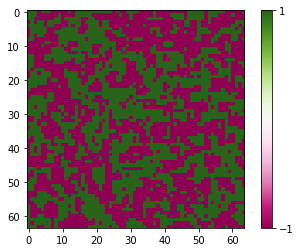

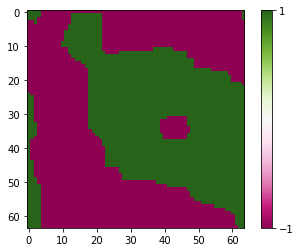

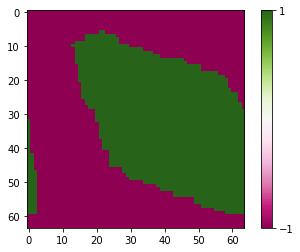

In [ ]:
#Call Ising Metropolis 2D
IME1 =Ising_2D_MEMC()
#run Snapshots
IME1.runGrid_Me()